worldRecords.csv
Columns 6
Rows 40

--------------------------------
Column 0 are indexes of rows, and therefore useless
--------------------------------
Column 1 is numerical.

Column 1 mean is: Distance    32.112725
dtype: float64 

Max value:  Distance    290.221
dtype: float64 

Min value:  Distance    0.1
dtype: float64

--------------------------------
Column 2 is categorical.

Column 2 mode is:   roadORtrack
0       track 



AttributeError: 'DataFrame' object has no attribute 'bar'

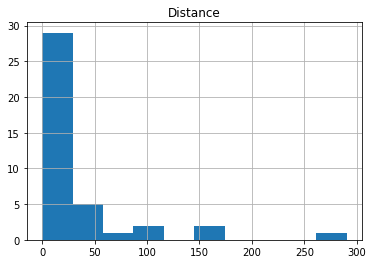

In [34]:
import pandas as pd
import matplotlib as plt
import numpy as np
import time
# TODO: Test categorical data, specifically the mode
# TODO: add test for useless data, Timestamps
# TODO: histograms per each column: numerical data
# TODO: bar plot for categorical columns

# These are the files we will be reading
data_sets = ['worldRecords.csv'] #['cars.csv', 'head.injury.csv',


# Loops through each csv file in 'data_sets'
for data in range(len(data_sets)):
    # Reads the CSV files with pandas
    DS1 = pd.read_csv(data_sets[data])

    print(data_sets[data])
    print('Columns', len(DS1.columns))
    print('Rows', len(DS1.values))
    print()

    # Booleans used in determining what types of data are in the columns
    categorical = False
    numerical = False

    # Loops through the first row to determine what kind of data we are looking at
    for i in range(len(DS1.values[1])):
        constant_for_all_observations = True                         # Boolean to determine if a column contains useless information
                
        # If the data is categorical
        if isinstance(DS1.values[1][i], str):
            column_data = DS1_Sliced.iterrows()
            prev_row = None
            for index, row in column_data:
                current_row = row[0]
                #print(index)
                if prev_row:
                    if current_row != prev_row:
                       constant_for_all_observations = False #Data is a constant and therefore redundant.
                prev_row = current_row
                
            #If the column is not timestamped, carry on with processing the data
            if not constant_for_all_observations:
                print('--------------------------------')
                print('Column', i, 'is categorical.\n')
                categorical = True                      # There is categorical data, sets Boolean to True
                DS1_Sliced = DS1.iloc[:, i:i + 1]       # Slices the data into a 1 wide column containing all of the rows

                # TODO mode may not work correctly, needs more testing on categorical data
                print('Column', i, 'mode is:', DS1_Sliced.mode(), '\n')

                DS1_Sliced.bar()

                # TODO: Add barplot here
                print()                                 # Blank line for formatting
            # Else the column is indexes
            else:
                print('--------------------------------')
                print('Column', i,  'is constant throughout, therefore redundant')
                
        # Else the data is numerical
        else:
            DS1_Sliced = DS1.iloc[:, i:i + 1]  # Slices the data into a 1 wide column containing all of the rows

            # Loops through each element in the column:
            #   Checks to see if the column is just the index for the row
            for index, row in DS1_Sliced.iterrows():
                #print(row[0] , " for index",index+1)               
                if row[0] == index+1:
                    is_an_index_row = True
                else:
                    is_an_index_row = False
            
            # If the column is not indexes, carry on with processing the data
            if not is_an_index_row:
                print('--------------------------------')
                print('Column', i, 'is numerical.\n')
                numerical = True                        # There is numerical data, sets the Boolean to True
                
                print('Column', i, 'mean is:', DS1_Sliced.mean(), '\n')
                
                print('Max value: ', DS1_Sliced.max(), '\n')
                print('Min value: ', DS1_Sliced.min())

                # TODO: add histogram here
                DS1_Sliced.hist()
                print()
                
            # Else the column is indexes
            else:
                print('--------------------------------')
                print('Column', i,  'are indexes of rows, and therefore useless')

    # If statements to check if the values are numerical, categorical or both
    print('--------------------------------')
    if categorical and not numerical:
        print("The data in", data_sets[data], "is categorical")
        print()
    if not categorical and numerical:
        print("The data in", data_sets[data], "is numerical")
        print()
    if categorical and numerical:
        print("The data in", data_sets[data], "is both numerical and categorical")
        print()

